In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# size of the vocabularies (label set) for each tbid
vocab_dict = {'ar_padt':1123,
              'bg_btb':178,
              'cs_cac':646,
              'cs_fictree':301,
              'cs_pdt':782,
              'en_ewt':389,
              'et_edt':178,
              'fr_sequoia':72,
              'fi_tdt':438,
              'it_isdt':353,
              'nl_alpino':424,
              'nl_lassysmall':304,
              'lt_alksnis':205,
              'lv_lvtb':134,
              'pl_lfg':180,
              'pl_pdb':890,
              'ru_syntagrus':657,
              'sk_snk':282,
              'sv_talbanken':326,
              'ta_ttb':123,
              'uk_iu':362
             }

In [3]:
# skip pl_lfg as we used pl_pdb for the test set, et_ewt we used rule-based
# fr_sequoia doesn't apply the rule.

TBIDS_TO_SKIP = ['et_edt', 'fr_sequoia', 'pl_lfg']

In [4]:
tbids = []

# gold and system success rates
gold_success = []
system_success = []

# y values: differences between success rate of rule on gold vs. dev
diffs = []

# x values: vocabulary (label set) size
vocab_sizes = []

with open("../case.csv") as f:
    for i, line in enumerate(f):
        # skip header
        if i >= 1:
            items = line.split(",")
            
            tbid = items[0]
            if tbid not in TBIDS_TO_SKIP:
                gold_s = items[1]
                system_s = items[2]
                gold_s = gold_s.split("%")[0]
                system_s = system_s.split("%")[0]
                
                diff = items[3]
                # remove percent sign
                diff = diff.split("%")[0]
                diff = float(diff)
                if diff > 50:
                    print("warning: considerable difference for {}".format(tbid))
                tbids.append(tbid)
                gold_success.append(float(gold_s) * 100)
                system_success.append(float(system_s) * 100)
                diffs.append(float(diff) * 100)
            
                if tbid in vocab_dict:
                    vocab_sizes.append(vocab_dict[tbid])
                else:
                    print("warning: no vocab size found for {}".format(tbid))

In [5]:
print(tbids)
print(gold_success)
print(system_success)
print(diffs)
print(vocab_sizes)

assert len(tbids) == len(diffs) == len(vocab_sizes) == len(gold_success) == len(system_success)

['ar_padt', 'bg_btb', 'cs_cac', 'cs_fictree', 'cs_pdt', 'en_ewt', 'fi_tdt', 'it_isdt', 'nl_alpino', 'nl_lassysmall', 'lv_lvtb', 'lt_alksnis', 'pl_pdb', 'ru_syntagrus', 'sk_snk', 'sv_talbanken', 'ta_ttb', 'uk_iu']
[86.30521149801356, 81.18402937127122, 87.2340425531915, 92.22316145393069, 87.76017962254991, 89.23154701718909, 88.5304659498208, 95.97402597402598, 93.64303178484109, 94.41786283891547, 57.166666666666664, 88.19444444444444, 94.1399416909621, 86.54914059056853, 94.28090832632464, 94.48698315467074, 96.72131147540983, 91.07594936708861]
[83.83383383383384, 76.72927164452588, 84.75728155339806, 87.01517706576728, 82.80795344325898, 83.785140562249, 39.285714285714285, 91.87784275503573, 86.8399675060926, 87.25099601593625, 47.08777686628384, 51.12107623318386, 84.72850678733032, 82.54317941487487, 83.05369127516778, 87.62626262626263, 33.33333333333333, 80.40455120101137]
[2.471377664179719, 4.45475772674534, 2.476760999793437, 5.2079843881634, 4.952226179290942, 5.4464064549

### Bar plot

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 10.})

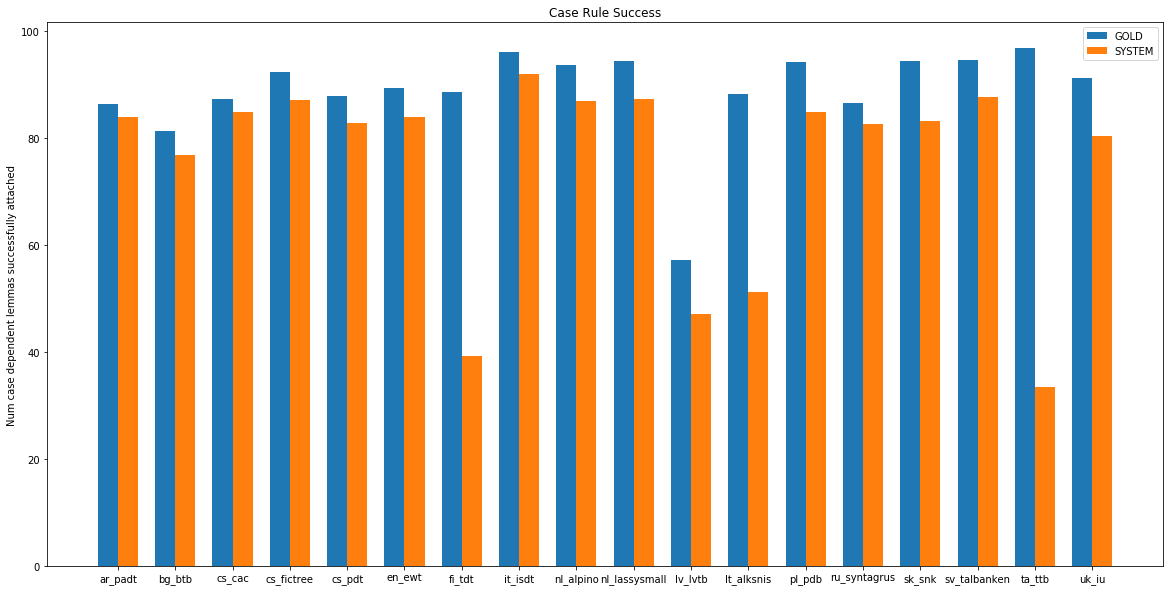

In [7]:
N = len(tbids)

ind = np.arange(N) 
width = 0.35    
plt.bar(ind, gold_success, width, label='GOLD')
plt.bar(ind + width, system_success, width, label='SYSTEM')

plt.ylabel('Num case dependent lemmas successfully attached')
plt.title('Case Rule Success')

plt.xticks(ind + width / 2, tbids)
plt.legend(loc='best')
plt.savefig('case_success.png')
plt.show()

### Regression

In [8]:
X = np.array(vocab_sizes)
X = X.reshape(-1, 1)

Y = np.array(diffs)
Y = Y.reshape(-1, 1)

In [9]:
model = linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([[-0.0232927]])

In [11]:
model.intercept_

array([23.85809244])

In [12]:
pred_Y = model.predict(X)

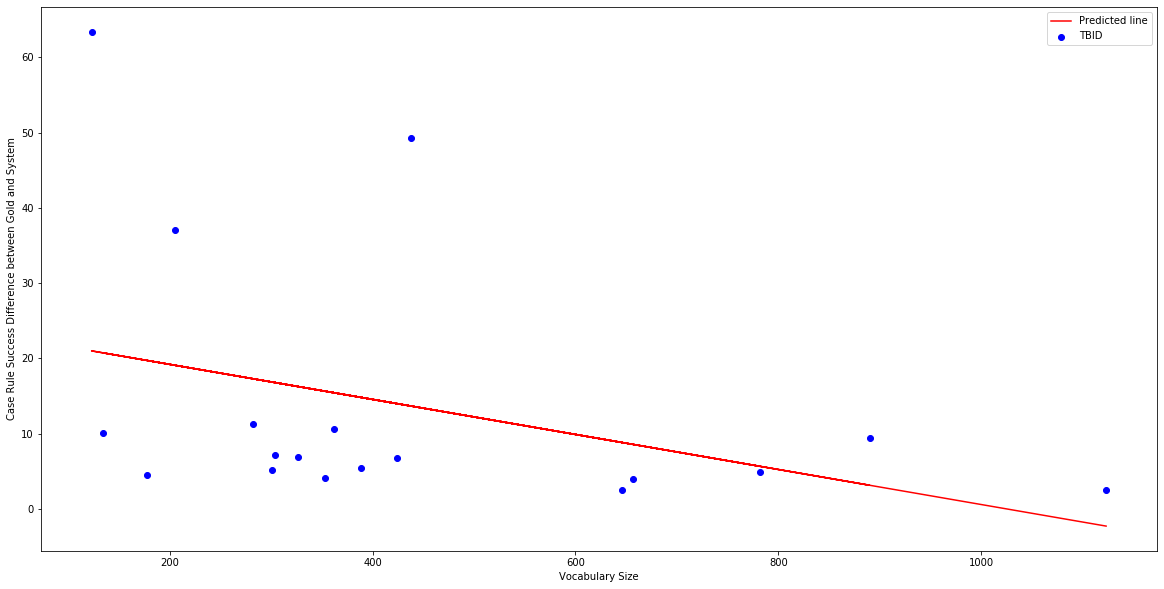

<Figure size 1440x720 with 0 Axes>

In [13]:
plt.scatter(X, Y, color='b')
plt.plot(X, pred_Y, 'r')
plt.legend(['Predicted line','TBID'])
plt.xlabel('Vocabulary Size')
plt.ylabel('Case Rule Success Difference between Gold and System')
plt.show()
plt.savefig('case_diff_vocab.png')